## 1. The most Nobel of Prizes
<p><img style="float: right;margin:5px 20px 5px 1px; max-width:250px" src="https://assets.datacamp.com/production/project_441/img/Nobel_Prize.png"></p>
O Prêmio Nobel é talvez o prêmio científico mais conhecido do mundo. Exceto pela honra, prestígio e prêmio em dinheiro substancial, o destinatário também recebe uma medalha de ouro mostrando Alfred Nobel (1833 - 1896) quem estabeleceu o prêmio. Todos os anos é dado a cientistas e acadêmicos nas categorias química, literatura, física, fisiologia ou medicina, economia e paz. O primeiro Prêmio Nobel foi entregue em 1901, e naquela época o Prêmio era muito eurocêntrico e voltado para os homens, mas hoje em dia não é tendencioso de forma alguma. Certamente. Direito?

Bem, vamos descobrir! A Fundação Nobel disponibilizou um conjunto de dados de todos os vencedores do prêmio desde o início do prêmio, em 1901, até 2016. Vamos carregá-lo e dar uma olhada.

In [2]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np

# Reading in the Nobel Prize data
nobel = pd.read_csv('nobel.csv')

# Taking a look at the first several winners
nobel.head(6)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Male,Munich University,Munich,Germany,1923-02-10,Munich,Germany


## 2. Então, quem ganha o Prêmio Nobel?
<p> Apenas olhando para os primeiros vencedores do prêmio, ou ganhadores do Nobel, como também são chamados, já vemos uma celebridade: Wilhelm Conrad Röntgen, o cara que descobriu os raios-X. E, na verdade, vemos que todos os vencedores em 1901 eram caras que vieram da Europa. Mas isso foi em 1901, olhando para todos os vencedores no conjunto de dados, de 1901 a 2016, qual sexo e qual país é o mais comumente representado? </p>
<p> (Para <em> country </em>, usaremos o <code> birth_country </code> do vencedor, pois <code> organization_country </code> é <code> NaN </code> para todos os prêmios Nobel compartilhados.) </p>

In [3]:
# Display the number of (possibly shared) Nobel Prizes handed
# out between 1901 and 2016
display(len(nobel['prize']))
# Display the number of prizes won by male and female recipients.
display(nobel['sex'].value_counts())

# Display the number of prizes won by the top 10 nationalities.
nobel['birth_country'].value_counts(ascending=False).head(10)

911

Male      836
Female     49
Name: sex, dtype: int64

United States of America    259
United Kingdom               85
Germany                      61
France                       51
Sweden                       29
Japan                        24
Canada                       18
Netherlands                  18
Russia                       17
Italy                        17
Name: birth_country, dtype: int64

## 3. Domínio dos EUA
<p> Talvez não seja tão surpreendente: o ganhador do Nobel mais comum entre 1901 e 2016 foi um homem nascido nos Estados Unidos da América. Mas em 1901 todos os vencedores eram europeus. Quando os EUA começaram a dominar as paradas do Prêmio Nobel? </p>

In [4]:
# Calculating the proportion of USA born winners per decade
nobel['usa_born_winner'] = nobel['birth_country'] == 'United States of America'
nobel['decade'] = (np.floor(nobel['year'] / 10) * 10).astype(int)
prop_usa_winners = nobel.groupby('decade', as_index=False)['usa_born_winner'].mean()

# Display the proportions of USA born winners per decade
display(prop_usa_winners)

,decade,usa_born_winner
0,1900,0.017544
1,1910,0.075000
2,1920,0.074074
3,1930,0.250000
4,1940,0.302326
5,1950,0.291667
6,1960,0.265823
7,1970,0.317308
8,1980,0.319588
9,1990,0.403846


## 4. Domínio dos EUA, visualizado
<p> Uma tabela está bem, mas para <em> ver </em> quando os EUA começaram a dominar as paradas do Nobel, precisamos de um enredo! </p>

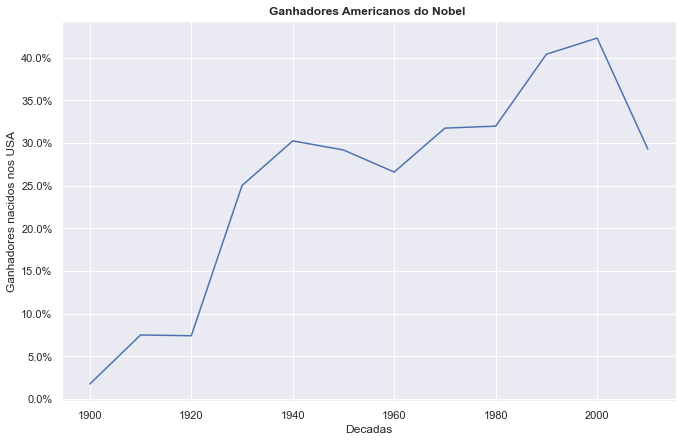

In [5]:
# Setting the plotting theme
sns.set()
# and setting the size of all plots.
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [11, 7]

# Plotting USA born winners 
ax = sns.lineplot(x='decade',y='usa_born_winner', data=prop_usa_winners)
ax.set(xlabel='Decadas', ylabel='Ganhadores nacidos nos USA')
ax.set_title('Ganhadores Americanos do Nobel ', weight='bold')

# Adding %-formatting to the y-axis
from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

## 5. Qual é o gênero de um típico ganhador do Prêmio Nobel?
<p> Assim, os EUA se tornaram os principais vencedores do Prêmio Nobel na década de 1930 e mantiveram a posição de liderança desde então. Mas um grupo que estava na liderança desde o início, e parece nunca desistir, são os <em> homens </em>. Talvez não deva ser um choque que haja algum desequilíbrio entre o número de vencedores de prêmios masculinos e femininos, mas quão significativo é esse desequilíbrio? E é melhor ou pior dentro de categorias de prêmios específicas, como física, medicina, literatura, etc.? </p>

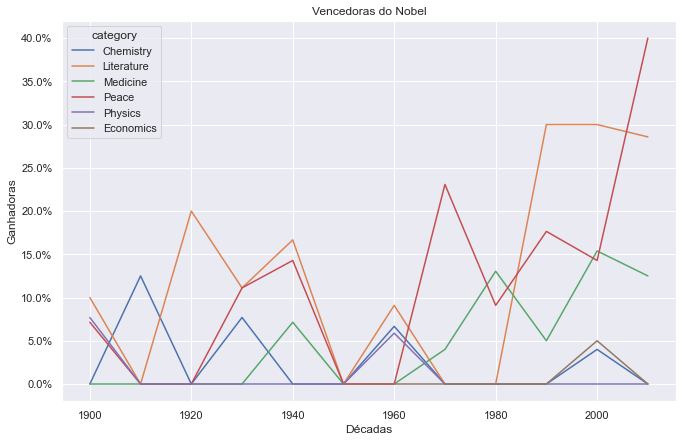

In [6]:
# Calculating the proportion of female laureates per decade
nobel['female_winner'] = nobel['sex'] == 'Female'
prop_female_winners = nobel.groupby(['decade','category'], as_index=False)['female_winner'].mean()

# Plotting USA born winners with % winners on the y-axis
ax = sns.lineplot(x='decade',y='female_winner', data=prop_female_winners, hue='category')
ax.set(xlabel='Décadas', ylabel='Ganhadoras')
ax.set_title('Vencedoras do Nobel')
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

## 6. A primeira mulher a ganhar o Prêmio Nobel
<p> O gráfico acima é um pouco confuso, pois as linhas estão superlotadas. Mas mostra algumas tendências e padrões interessantes. No geral, o desequilíbrio é muito grande, com física, economia e química tendo o maior desequilíbrio. A medicina tem uma tendência um tanto positiva e, desde a década de 1990, o prêmio de literatura também está mais equilibrado. A grande diferença é o prêmio da paz durante a década de 2010, mas lembre-se de que isso cobre apenas os anos de 2010 a 2016. </p>
<p> Diante desse desequilíbrio, quem foi a primeira mulher a receber o Prêmio Nobel? E em que categoria? </p>

In [7]:
# Picking out the first woman to win a Nobel Prize
nobel[nobel['female_winner']==True].nsmallest(1, 'female_winner')

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True


## 7. laureados repetidos
<p> Para a maioria dos cientistas / escritores / ativistas, um Prêmio Nobel seria o coroamento de uma longa carreira. Mas, para algumas pessoas, um simplesmente não é o suficiente, e poucos o entenderam mais de uma vez. Quem são esses poucos sortudos? (Como não ganhei nenhum Prêmio Nobel, presumo que seja apenas uma questão de sorte.) </p>

In [8]:
# Selecting the laureates that have received 2 or more prizes.
nobel.groupby('full_name').filter(lambda group: len(group)>=2)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,Sorbonne University,Paris,France,1934-07-04,Sallanches,France,False,1910,True
89,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1910,False
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1940,False
278,1954,Chemistry,The Nobel Prize in Chemistry 1954,"""for his research into the nature of the chemi...",1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",...,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,True,1950,False
283,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,515,Organization,Office of the United Nations High Commissioner...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1950,False
298,1956,Physics,The Nobel Prize in Physics 1956,"""for their researches on semiconductors and th...",1/3,66,Individual,John Bardeen,1908-05-23,"Madison, WI",...,Male,University of Illinois,"Urbana, IL",United States of America,1991-01-30,"Boston, MA",United States of America,True,1950,False
306,1958,Chemistry,The Nobel Prize in Chemistry 1958,"""for his work on the structure of proteins, es...",1/1,222,Individual,Frederick Sanger,1918-08-13,Rendcombe,...,Male,University of Cambridge,Cambridge,United Kingdom,2013-11-19,Cambridge,United Kingdom,False,1950,False
340,1962,Peace,The Nobel Peace Prize 1962,NaN,1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",...,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,True,1960,False
348,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1960,False


## 8. Quantos anos você tinha quando recebeu o prêmio?
<p> A lista de vencedores repetidos contém alguns nomes ilustres! Mais uma vez encontramos Marie Curie, que ganhou o prêmio de física por descobrir a radiação e de química por isolar rádio e polônio. John Bardeen conseguiu duas vezes em física para transistores e supercondutividade, Frederick Sanger duas vezes em química e Linus Carl Pauling, primeiro em química e depois em paz, por seu trabalho na promoção do desarmamento nuclear. Também descobrimos que as organizações também ganham o prêmio, já que a Cruz Vermelha e o ACNUR o receberam duas vezes. </p>
<p> Mas, em geral, quantos anos você tem quando recebe o prêmio? </p>

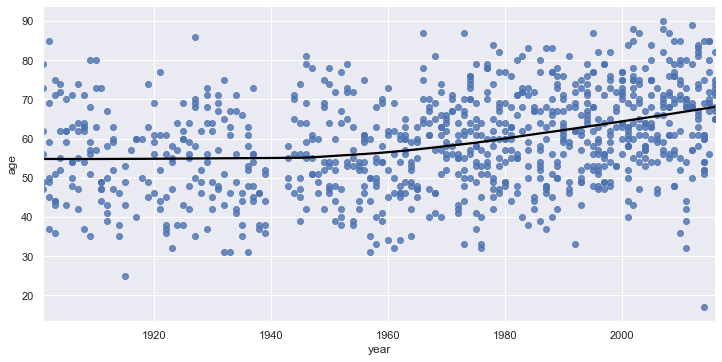

In [9]:
# Converting birth_date from String to datetime
nobel['birth_date'] = pd.to_datetime(nobel['birth_date'])

# Calculating the age of Nobel Prize winners
nobel['age'] = (nobel['year'] - nobel['birth_date'].dt.year)

# Plotting the age of Nobel Prize winners
sns.lmplot(x='year', y='age', data=nobel, line_kws={'color':'black'}, lowess=True, aspect=2)
plt.show()

## 9. Diferenças de idade entre as categorias de prêmios
<p> O enredo acima nos mostra muito! Vemos que as pessoas costumavam ter cerca de 55 anos quando recebiam o preço, mas hoje a média está perto dos 65. Mas há uma grande diferença na idade dos laureados e, embora a maioria tenha mais de 50 anos, alguns são muito jovens. </ p>
<p> Também vemos que a densidade de pontos é muito alta hoje em dia do que no início dos anos 1900 - hoje em dia muitos mais prêmios são compartilhados e, portanto, há muito mais vencedores. Vemos também que houve uma interrupção na entrega de prêmios por volta da Segunda Guerra Mundial (1939-1945). </p>
<p> Vejamos as tendências de idade em diferentes categorias de prêmios. </p>

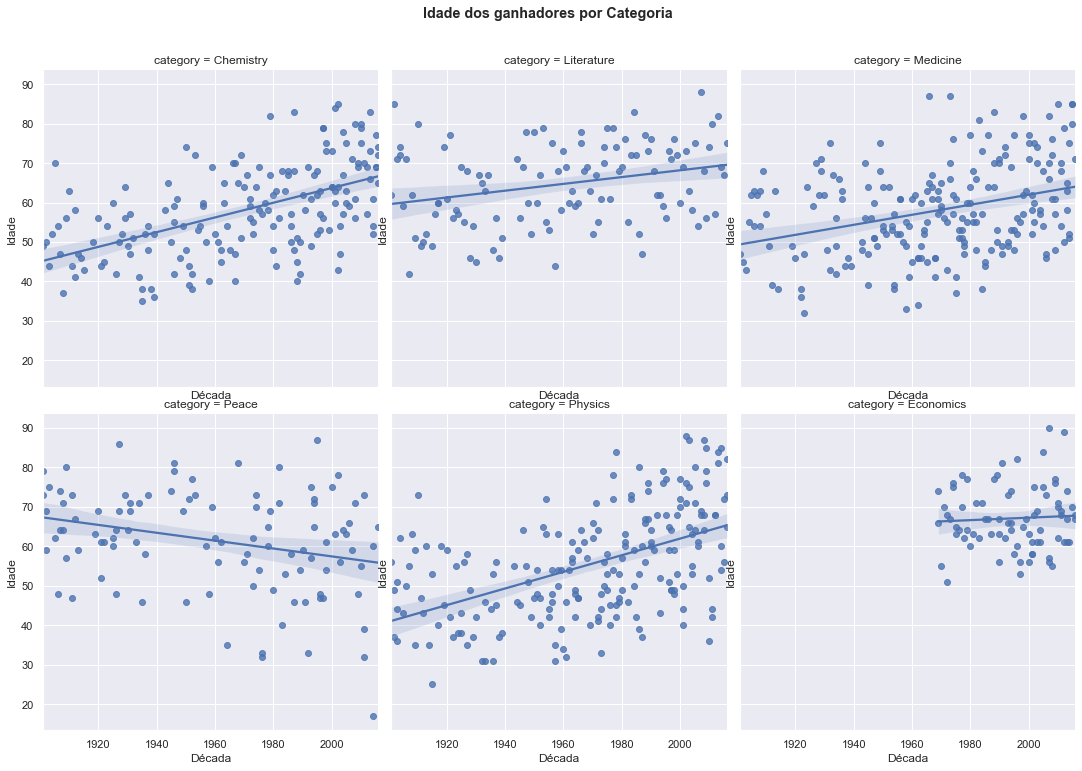

In [10]:
# Same plot as above, but separate plots for each type of Nobel Prize
ax = sns.lmplot(x='year', y='age', col='category', col_wrap=3, data=nobel)
ax.set(xlabel='Década', ylabel='Idade')
plt.suptitle('Idade dos ganhadores por Categoria', y=1.05, weight='bold')
plt.show()

## 10. Vencedores mais velhos e mais jovens
<p> Mais tramas com muitas coisas interessantes acontecendo! Vemos que os dois vencedores do prêmio de química, medicina e física envelheceram com o tempo. A tendência é mais forte para a física: a idade média costumava ser inferior a 50 anos e agora está quase aos 70. Literatura e economia estão mais estáveis. Também vemos que a economia é uma categoria mais recente. Mas a paz mostra uma tendência oposta em que os vencedores estão ficando mais jovens! </p>
<p> Na categoria paz, também somos um vencedor em 2010 que parece excepcionalmente jovem. Isso levanta a questão: quem são as pessoas mais velhas e mais jovens a ganhar um Prêmio Nobel? </p>

In [11]:
# The oldest winner of a Nobel Prize as of 2016
display(nobel.nlargest(1,'age'))
# The youngest winner of a Nobel Prize as of 2016
nobel.nsmallest(1,'age')

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner,age
793,2007,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having laid the foundations of mechanism ...",1/3,820,Individual,Leonid Hurwicz,1917-08-21,Moscow,...,University of Minnesota,"Minneapolis, MN",United States of America,2008-06-24,"Minneapolis, MN",United States of America,False,2000,False,90.0


,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner,age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,914,Individual,Malala Yousafzai,1997-07-12,Mingora,...,NaN,NaN,NaN,NaN,NaN,NaN,False,2010,True,17.0


## 11. You get a prize!
<p><img style="float: right;margin:20px 20px 20px 20px; max-width:200px" src="https://assets.datacamp.com/production/project_441/img/paint_nobel_prize.png"></p>
<p> Ei! Você ganha um prêmio por chegar ao final deste caderno! Pode não ser um Prêmio Nobel, mas eu mesmo fiz com tinta, então deve contar para alguma coisa. Mas não se desespere, Leonid Hurwicz tinha 90 anos quando recebeu seu prêmio, então pode não ser tarde demais para você. Quem sabe. </p>
<p> Antes de partir, qual foi o nome do mais jovem vencedor de todos os tempos que em 2014 recebeu o prêmio por "[ela] luta contra a repressão de crianças e jovens e pelo direito de todas as crianças à educação"? </ p>

In [12]:
# The name of the youngest winner of the Nobel Prize as of 2016
youngest_winner = 'Malala Yousafzai'